In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("HousePrice.csv")
dataset.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,313000.0
1,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2384000.0
2,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,342000.0
3,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,420000.0
4,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,550000.0


In [3]:
dataset.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
price            0
dtype: int64

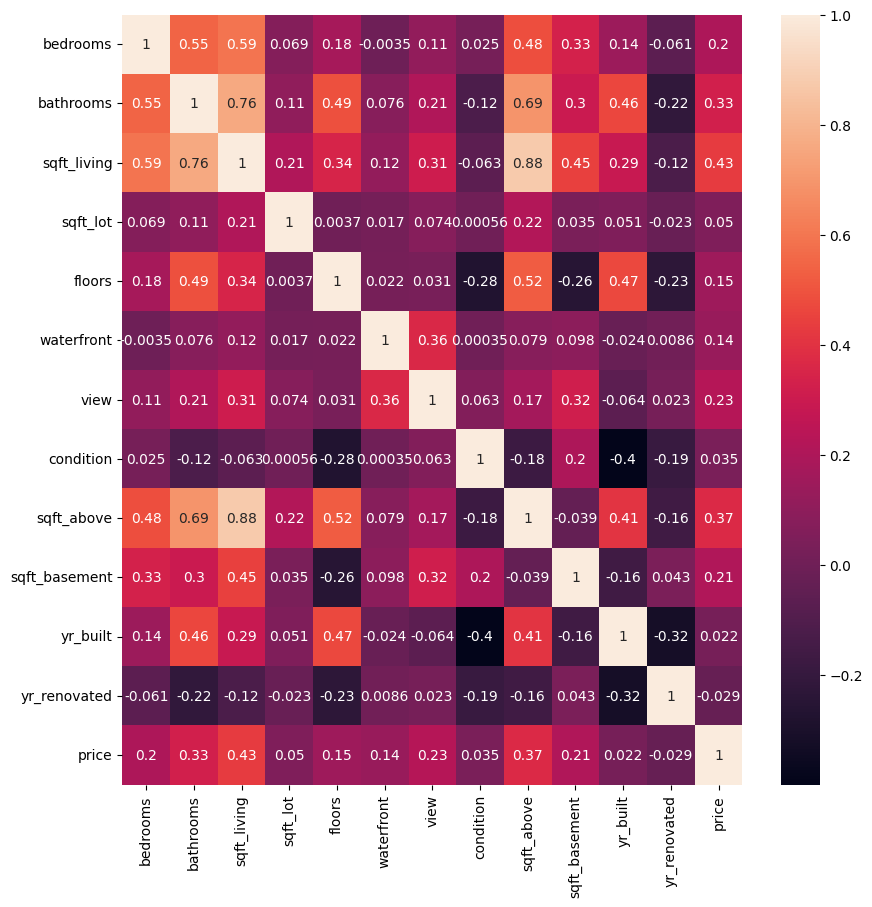

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr() , annot= True)
plt.show()

* A square heatmap showing how strongly each pair of variables in the dataset is correlated (values from -1 to +1).

In [5]:
x = dataset.iloc[ : , : -1]
y = dataset["price"]

In [6]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x) , columns=x.columns)

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge

In [9]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
import numpy as np

* Linear Regression 

In [10]:
lr = LinearRegression()
lr.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
lr.score(x_test , y_test)*100

3.228385663270661

In [12]:
print(mean_squared_error(y_test , lr.predict(x_test)))
print(mean_absolute_error(y_test , lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test , lr.predict(x_test))))

986921767056.1217
210908.173249839
993439.3625461605


In [13]:
lr.coef_

array([-58612.02450809,  28620.91876252, 137630.25418389, -18457.45554189,
        37581.76040751,  32277.52943856,  34834.37139825,  19864.74096006,
       120697.08870061,  61415.30012411, -76377.67737856,   8089.00372624])

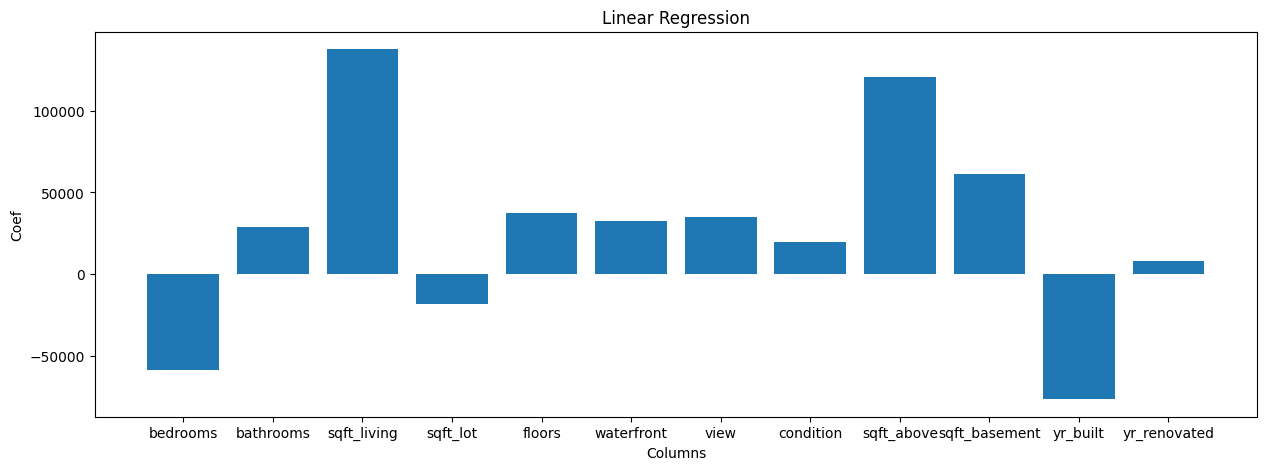

In [14]:
plt.figure(figsize=(15 , 5))
plt.bar(x.columns , lr.coef_)
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

* Lasso

In [15]:
la = Lasso(alpha=0.01)
la.fit(x_train , y_train)
la.score(x_test,y_test)*100

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+13, tolerance: 5.229e+10
  model = cd_fast.enet_coordinate_descent(


3.228385177605708

In [16]:
print(mean_squared_error(y_test , la.predict(x_test)))
print(mean_absolute_error(y_test , la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test , la.predict(x_test))))

986921772009.158
210908.17447564355
993439.3650390335


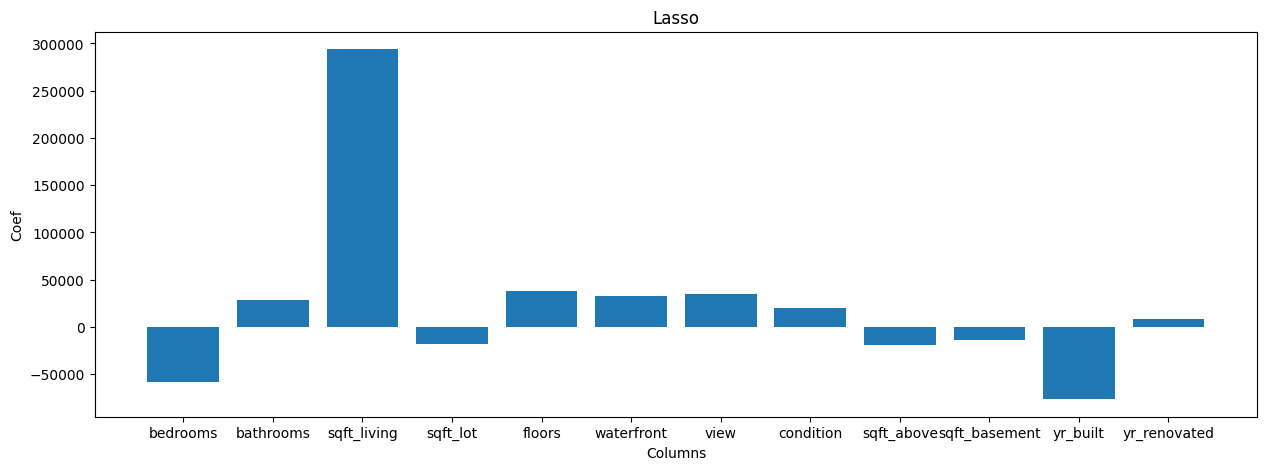

In [17]:
plt.figure(figsize=(15 , 5))
plt.bar(x.columns , la.coef_)
plt.title("Lasso")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

* Ridge

In [18]:
ri = Ridge( alpha= 10)
ri.fit(x_train,y_train)
ri.score(x_test , y_test)*100

3.24019941712842

In [19]:
print(mean_squared_error(y_test , ri.predict(x_test)))
print(mean_absolute_error(y_test , ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test , ri.predict(x_test))))

986801284919.7765
210815.9478735795
993378.7217973699


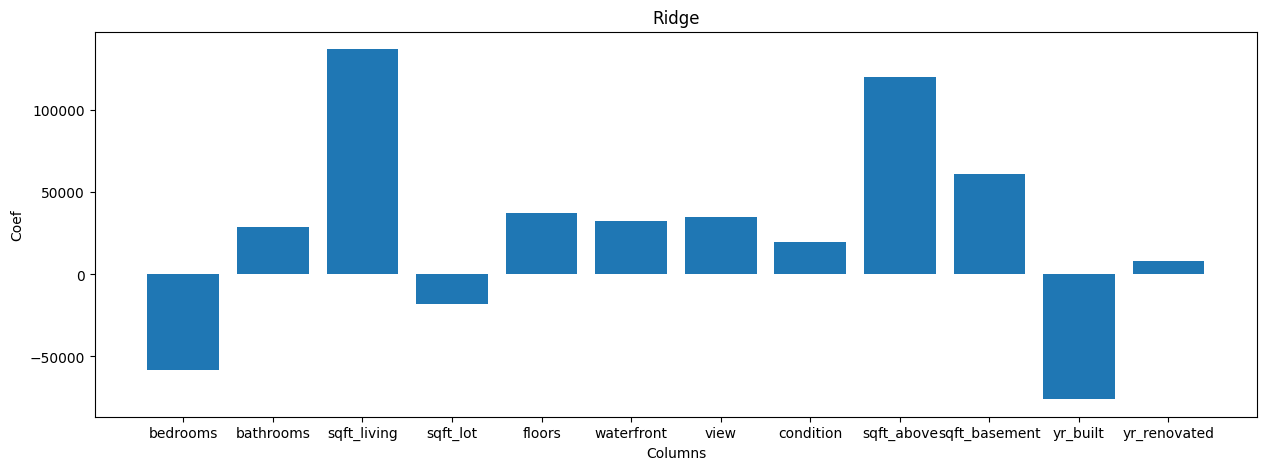

In [20]:
plt.figure(figsize=(15 , 5))
plt.bar(x.columns , ri.coef_)
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

* Compaire there coff. value 

In [21]:
df = pd.DataFrame({"col_name":x.columns , "LinearRegression" : lr.coef_ , "Lasso" : la.coef_,"Ridge": ri.coef_})

In [22]:
df

,col_name,LinearRegression,Lasso,Ridge
0,bedrooms,-58612.024508,-58612.012069,-58006.052994
1,bathrooms,28620.918763,28620.851520,28878.686086
2,sqft_living,137630.254184,293862.914858,137085.109644
3,sqft_lot,-18457.455542,-18457.444078,-18298.877275
4,floors,37581.760408,37581.763676,37445.130830
5,waterfront,32277.529439,32277.522911,32264.182806
6,view,34834.371398,34834.367544,34968.321859
7,condition,19864.740960,19864.724543,19870.905664
8,sqft_above,120697.088701,-19147.129423,120223.632684
9,sqft_basement,61415.300124,-13867.961864,61163.461025
